# Dogs vs. Cats

Only pick up 1000 images to train the CNN model.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
from matplotlib import image
import seaborn as sns
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


## Loading images

In [2]:
# !unzip /kaggle/input/dogs-vs-cats/train.zip
# !unzip /kaggle/input/dogs-vs-cats/test1.zip

from zipfile import ZipFile

zf = ZipFile('/kaggle/input/dogs-vs-cats/test1.zip', 'r')
zf.extractall('/kaggle/working')
zf.close()

zf = ZipFile('/kaggle/input/dogs-vs-cats/train.zip', 'r')
zf.extractall('/kaggle/working')
zf.close()

In [3]:
import os, shutil

original_dataset_dir = '/kaggle/working/train' 
train_place = '/kaggle/working' 
base_dir = os.path.join(train_place, 'class')
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation') 
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats') 
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs') 
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats') 
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs') 
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats') 
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs') 
os.mkdir(test_dogs_dir)

In [5]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(train_cats_dir, fname) 
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_cats_dir, fname) 
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)] 
for fname in fnames:
        src = os.path.join(original_dataset_dir, fname) 
        dst = os.path.join(test_cats_dir, fname) 
        shutil.copyfile(src, dst)
        
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(train_dogs_dir, fname) 
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_dogs_dir, fname) 
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(test_dogs_dir, fname) 
    shutil.copyfile(src, dst)

In [6]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [7]:
from keras import layers
from keras import models

def build_model():
    
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
    model.add(layers.MaxPooling2D((2, 2))) 
    model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
    model.add(layers.MaxPooling2D((2, 2))) 
    model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
    model.add(layers.MaxPooling2D((2, 2))) 
    model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
    model.add(layers.MaxPooling2D((2, 2))) 
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu')) 
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

In [8]:
model = build_model()
model.summary()

# 3 * 3 * 32 * 3(r, g, b) = # 896
# 3 * 3 * 64 * 32 + 64 = # 18496
# 3 * 3 * 128 * 64 + 128 = # 73856
# 3 * 3 * 128 * 128 + 128 = # 147584
# 7 * 7 * 128 * 512 + 512 = # 3211776

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
from keras import optimizers 

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4), 
    metrics=['acc']
)

In [10]:
from keras.preprocessing.image import ImageDataGenerator 

train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),
    batch_size=20, 
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory( 
    validation_dir,
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30, 
    validation_data=validation_generator, 
    validation_steps=50,
)

Epoch 1/30
100/100 [==============================] - 16s 91ms/step - loss: 0.6905 - acc: 0.5480 - val_loss: 0.6713 - val_acc: 0.6140
Epoch 2/30
100/100 [==============================] - 9s 91ms/step - loss: 0.6598 - acc: 0.6015 - val_loss: 0.6426 - val_acc: 0.6370
Epoch 3/30
100/100 [==============================] - 9s 88ms/step - loss: 0.6200 - acc: 0.6565 - val_loss: 0.6284 - val_acc: 0.6180
Epoch 4/30
100/100 [==============================] - 9s 94ms/step - loss: 0.5764 - acc: 0.6920 - val_loss: 0.6114 - val_acc: 0.6560
Epoch 5/30
100/100 [==============================] - 9s 89ms/step - loss: 0.5464 - acc: 0.7200 - val_loss: 0.5800 - val_acc: 0.6890
Epoch 6/30
100/100 [==============================] - 9s 90ms/step - loss: 0.5150 - acc: 0.7480 - val_loss: 0.5862 - val_acc: 0.6880
Epoch 7/30
100/100 [==============================] - 9s 95ms/step - loss: 0.4843 - acc: 0.7665 - val_loss: 0.6137 - val_acc: 0.6750
Epoch 8/30
100/100 [==============================] - 9s 89ms/step -

In [13]:
model.save('/kaggle/working/cats_and_dogs_small_1.h5')

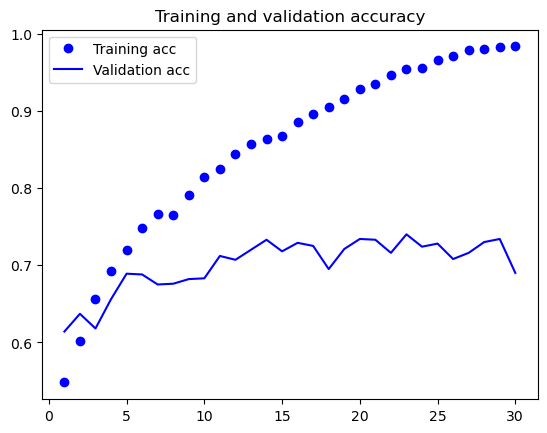

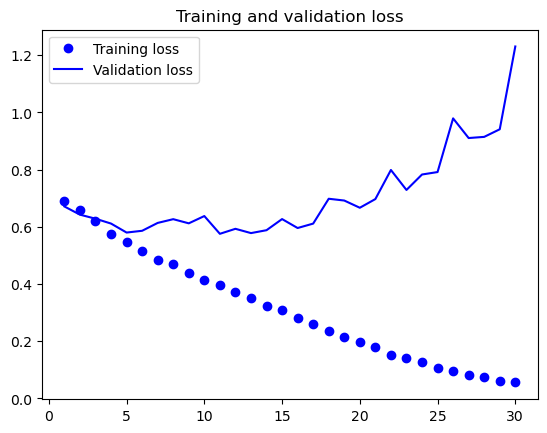

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
datagen = ImageDataGenerator( 
    rotation_range=40,
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest',
)

## Using data augmentation

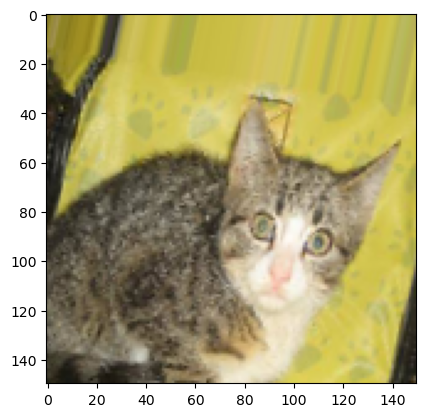

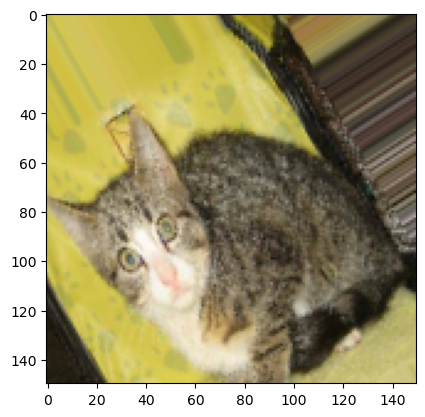

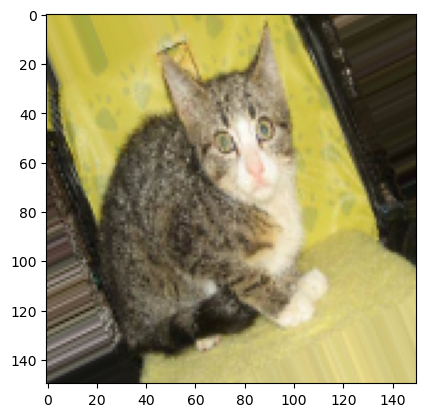

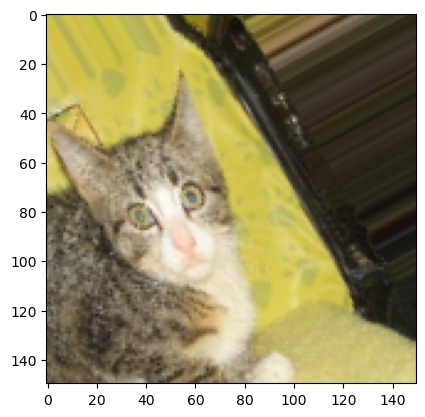

In [16]:
"""
from keras.preprocessing import image

AttributeError: module 'keras.preprocessing.image' has no attribute 'load_img'
"""

import keras.utils as image


fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0])) 
    i += 1

    if i % 4 == 0:
        break
    
plt.show()

In [17]:
def build_model_with_dropout():

    model = models.Sequential() 
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
    model.add(layers.MaxPooling2D((2, 2))) 
    model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
    model.add(layers.MaxPooling2D((2, 2))) 
    model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
    model.add(layers.MaxPooling2D((2, 2))) 
    model.add(layers.Flatten()) 
    model.add(layers.Dropout(0.5)) 
    model.add(layers.Dense(512, activation='relu')) 
    model.add(layers.Dense(1, activation='sigmoid')) 
    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizers.RMSprop(learning_rate=1e-4), 
        metrics=['acc']
    )
    
    return model

In [18]:
model = build_model_with_dropout()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [19]:
train_datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,
)
test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory( 
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
history = model.fit( 
    train_generator,
    steps_per_epoch=100,
    epochs=100, 
    validation_data=validation_generator, 
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 20s 187ms/step - loss: 0.6941 - acc: 0.5140 - val_loss: 0.6885 - val_acc: 0.5010


In [21]:
model.save('/kaggle/working/cats_and_dogs_small_2.h5')

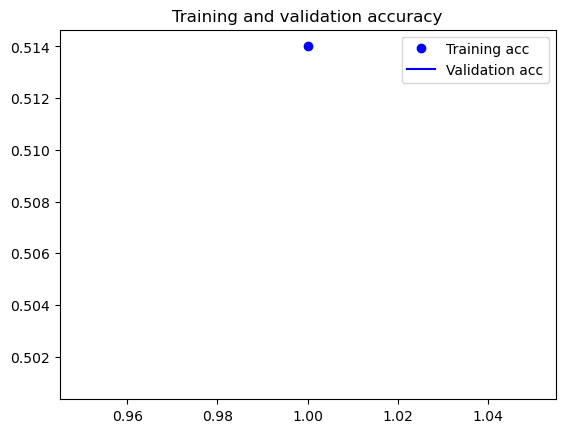

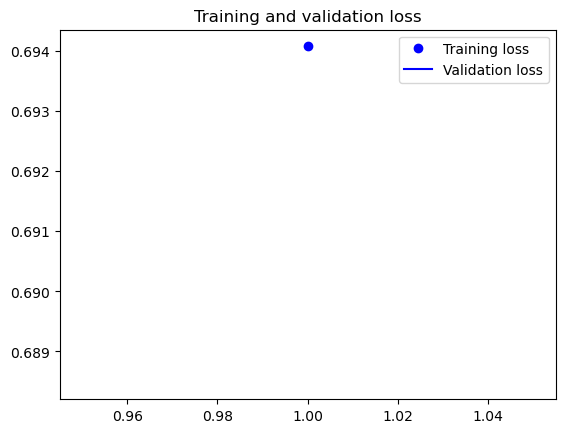

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()

plt.show()